# Imports

In [11]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import cv2

# Data Analysis

Выгрузка данных

In [12]:
df =  pd.read_csv('facial_keypoints.csv')

In [13]:
with np.load('face_images.npz') as data:
    images = data['face_images']

C:\Users\max\AppData\Local\Temp\ipykernel_25620\2639324506.py:2: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  images = data['face_images']


In [14]:
images = np.swapaxes(np.swapaxes(images, 1, 2), 0, 1)

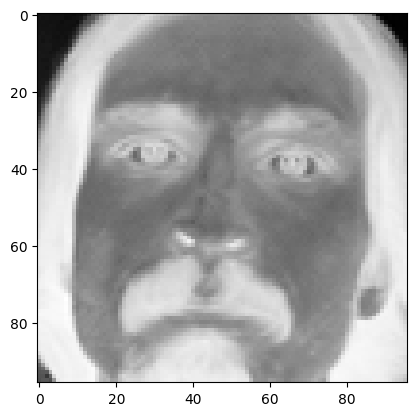

In [15]:
plt.imshow(images[0], cmap='Greys')

In [16]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


проверка на то, чтобы у всех картинок был одинаковый размер

In [17]:
for image in images:
    print(image.shape)

(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(96, 96)
(

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,7039.0,66.359021,3.448233,22.763345,65.082895,66.497566,68.024752,94.689280
left_eye_center_y,7039.0,37.651234,3.152926,1.616512,35.900451,37.528055,39.258449,80.502649
right_eye_center_x,7036.0,30.306102,3.083230,0.686592,28.783339,30.251378,31.768334,85.039381
right_eye_center_y,7036.0,37.976943,3.033621,4.091264,36.327681,37.813273,39.566729,81.270911
left_eye_inner_corner_x,2271.0,59.159339,2.690354,19.064954,58.039339,59.304615,60.519810,84.440991
left_eye_inner_corner_y,2271.0,37.944752,2.307332,27.190098,36.626283,37.878040,39.260348,66.562559
left_eye_outer_corner_x,2267.0,73.330478,3.405852,27.571879,71.716503,73.247824,75.015645,95.258090
left_eye_outer_corner_y,2267.0,37.707008,2.881438,26.250023,36.085523,37.639015,39.373489,64.618230
right_eye_inner_corner_x,2268.0,36.652607,2.350268,5.751046,35.506126,36.651562,37.753571,70.714966
right_eye_inner_corner_y,2268.0,37.989902,2.311907,26.250023,36.766783,37.944075,39.192917,69.808803


In [19]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

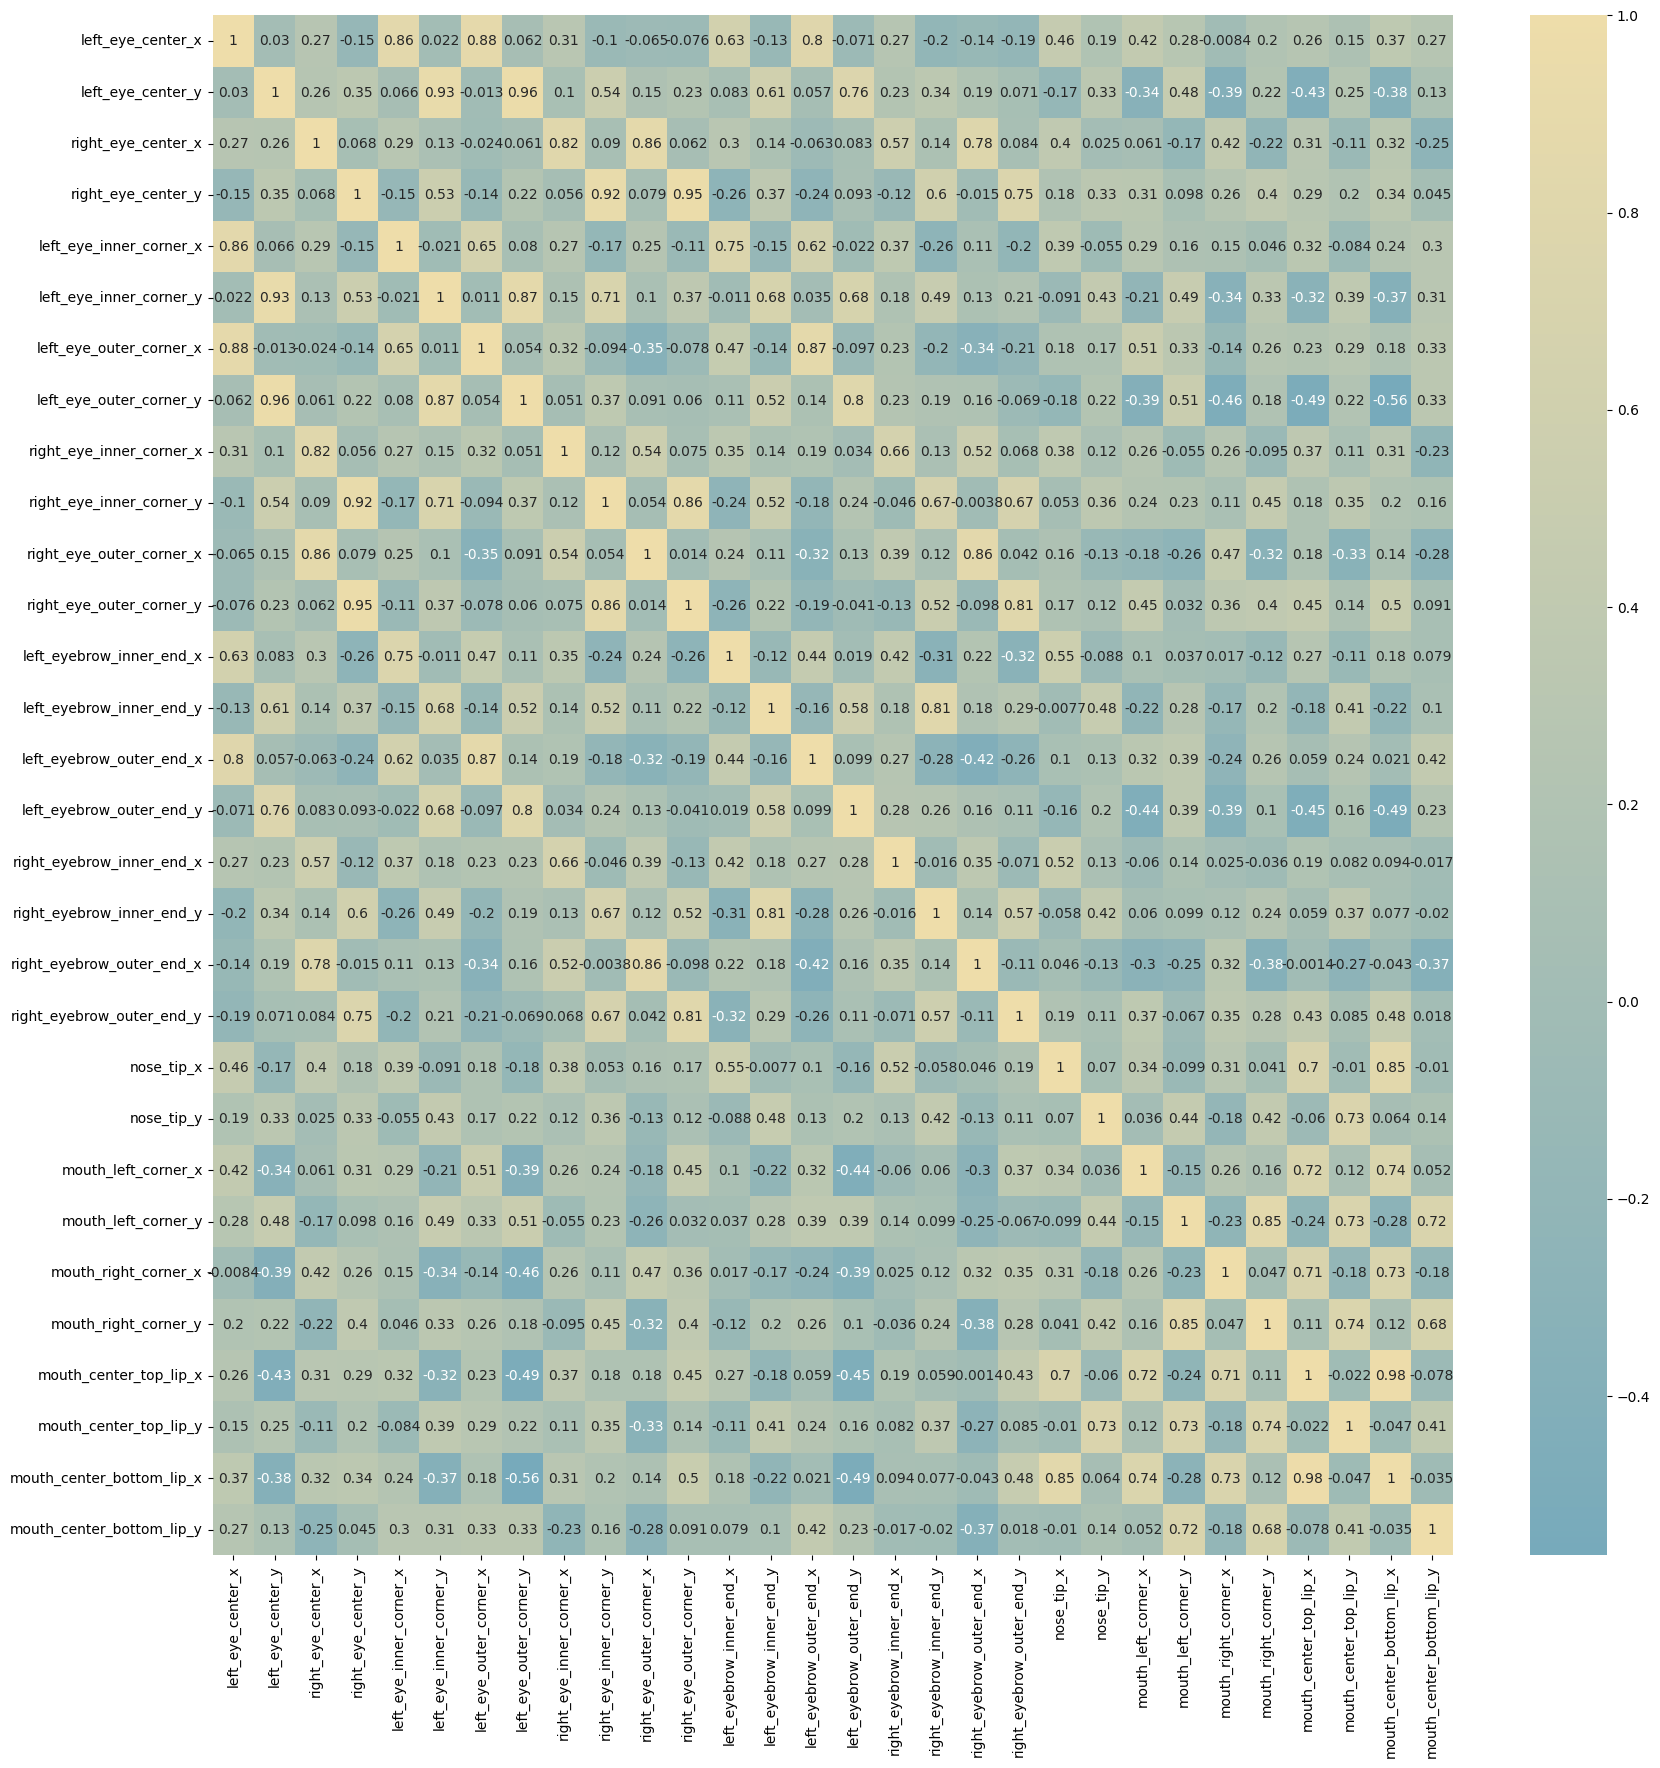

In [20]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True),annot=True)
plt.show()

у некоторых фич высокие корреляции 

# Data Preprocessing
Дропнем нулевые значения

In [21]:
null_rows = df[['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y']].isnull().any(axis=1)
null_indices = null_rows[null_rows].index

In [22]:
images = np.delete(images, null_indices, axis=0)
df = df.dropna(subset=['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y'], how='any')

In [23]:
df.isnull().sum()

left_eye_center_x               0
left_eye_center_y               0
right_eye_center_x              0
right_eye_center_y              0
left_eye_inner_corner_x      4773
left_eye_inner_corner_y      4773
left_eye_outer_corner_x      4776
left_eye_outer_corner_y      4776
right_eye_inner_corner_x     4771
right_eye_inner_corner_y     4771
right_eye_outer_corner_x     4771
right_eye_outer_corner_y     4771
left_eyebrow_inner_end_x     4774
left_eyebrow_inner_end_y     4774
left_eyebrow_outer_end_x     4819
left_eyebrow_outer_end_y     4819
right_eyebrow_inner_end_x    4777
right_eyebrow_inner_end_y    4777
right_eyebrow_outer_end_x    4811
right_eyebrow_outer_end_y    4811
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4778
mouth_left_corner_y          4778
mouth_right_corner_x         4777
mouth_right_corner_y         4777
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

Разделим датасет на 2 части

In [24]:
df_non_missing = df.dropna()
df_missing = df.loc[df.isna().any(axis=1)]

Заполним пустые значения с помощью KNN

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_non_missing)

In [26]:
imputer = KNNImputer(n_neighbors=11)
imputer.fit(df_scaled)

KNNImputer(n_neighbors=11)

In [27]:
df_missing_scaled = scaler.transform(df_missing)
df_missing_imputed = imputer.transform(df_missing_scaled)

In [28]:
df_imputed = scaler.inverse_transform(df_missing_imputed)
df_combined = pd.concat([df_non_missing, pd.DataFrame(df_imputed, columns=df.columns)])

Создадим массивы с точками глаз и носа

In [29]:
left_eye_center = (df_combined['left_eye_center_x'], df_combined['left_eye_center_y'])
right_eye_center = (df_combined['right_eye_center_x'], df_combined['right_eye_center_y'])
left_eye_inner_corner = (df_combined['left_eye_inner_corner_x'], df_combined['left_eye_inner_corner_y'])
left_eye_outer_corner = (df_combined['left_eye_outer_corner_x'], df_combined['left_eye_outer_corner_y'])
right_eye_inner_corner = (df_combined['right_eye_inner_corner_x'], df_combined['right_eye_inner_corner_y'])
right_eye_outer_corner = (df_combined['right_eye_outer_corner_x'], df_combined['right_eye_outer_corner_y'])

left_eye_points = np.array([left_eye_inner_corner, left_eye_center, left_eye_outer_corner])
right_eye_points = np.array([right_eye_inner_corner, right_eye_center, right_eye_outer_corner])

nose_points = np.array([(df_combined.nose_tip_x, df_combined.nose_tip_y)])

eye_points = np.concatenate([left_eye_points, right_eye_points, nose_points], axis=0)

Функция, которая рисует точки

In [30]:
def plot_points(img, points):
    points = np.array(points, dtype=np.int32)

    img = img.copy()

    for point in points:
        cv2.circle(img, point, radius=0, color=(255, 0, 0), thickness=1)

    return img

проверим функцию

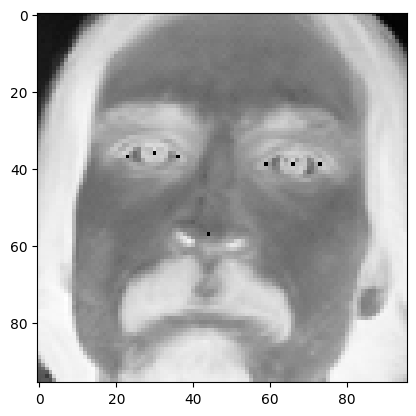

In [31]:
points = eye_points[:, :, 0]
img = plot_points(images[0],points)
plt.imshow(img, cmap='Greys')

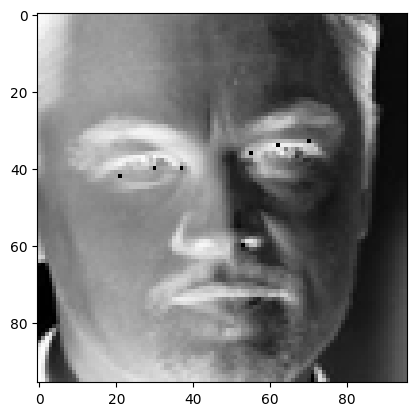

In [32]:
points = eye_points[:,:,1901]
img = plot_points(images[1901],points)
plt.imshow(img, cmap='Greys')

На данном этапе нужно учесть, что точки не всегда отрисовываются правильно, поэтому в дальнейшем модель может быть плохо обучена